두 가지 방법으로 2차원 속도모델을 그려보겠습니다. 첫 번째 방법은 SU의 `psimage`를 이용하는 방법, 두 번째는 python의 matplotlib을 이용하는 방법입니다.

## psimage로 그리기

첫 번째 방법부터 보겠습니다. `psimage`는 쉘에서 사용하는 명령어이지만, [gpl]({% post_url 2014-07-26-geophysical-prospecting-library %}) 라이브러리의 [psplot]({% post_url 2016-10-10-plot_seismic_processing_results %}) 모듈을 이용하면 python 명령을 통해 간편하게 속도모델을 그릴 수 있습니다. Marmousi 속도모델을 그림으로 그려보겠습니다.

In [1]:
nx=576
ny=188
h=0.016
fin="marm16km.drt"

In [2]:
from gpl.psplot import plot

opt="n1={0} d1={1} d2={1} d1num=1 lbeg=1.5 lend=5.5".format(ny,h,h)
plot.velocity("marm16km.png",fin,opt)

psimage label1="Depth (km)" legend=1 d2s=0.5 lheight=1.0 lstyle="vertright" label2="Distance (km)" height=1.0 labelsize=8 lwidth=0.1 d1s=0.5 width=2.65  n1=188 d1=0.016 d2=0.016 d1num=1 lbeg=1.5 lend=5.5 < marm16km.drt > marm16km.eps

// adding velocity unit (km/s)

// fixing bounding box

// converting .eps to .png ..


![vel](marm16km.png)
(marm16km.png)

`velocity_color`를 이용해 컬러로 그릴 수도 있습니다.

In [3]:
plot.velocity_color("marm16km_color.png",fin,opt)

psimage label1="Depth (km)" ghls="0.33,0.5,1" bps=24 bhls="0.67,0.5,1" d1s=0.5 lwidth=0.1 whls="0,0.5,1" legend=1 d2s=0.5 lheight=1.0 lstyle="vertright" label2="Distance (km)" height=1.0 labelsize=8 width=2.65  n1=188 d1=0.016 d2=0.016 d1num=1 lbeg=1.5 lend=5.5 < marm16km.drt > marm16km_color.eps

// adding velocity unit (km/s)

// fixing bounding box

// converting .eps to .png ..


![vel](marm16km_color.png)
(marm16km_color.png)

## Matplotlib으로 그리기

두 번째 방법은 python의 matplotlib 라이브러리를 이용하는 방법입니다. 이를 위해서는 코드에서 numpy를 이용해 속도모델을 읽어들인 후에 matplotlib으로 그립니다. 속도모델을 그리는 부분은 함수로 작성하였는데, 필요에 따라 수정해서 사용하면 되겠습니다.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_vel(vel,h,figsize=[15,4],unit='km/s',xticks=None,yticks=None,cticks=None,cmap='gray_r',fontsize=20):
    xmax=(vel.shape[0]-1)*h
    ymax=(vel.shape[1]-1)*h
    
    plt.figure(figsize=figsize)
    plt.imshow(vel.transpose(),extent=(0,xmax,ymax,0),cmap=cmap)

    # x,y labels
    plt.xlabel('Distance (km)',fontsize=fontsize)
    plt.ylabel('Depth (km)',fontsize=fontsize)

    # x,y ticks, tick labels
    plt.tick_params(labelsize=fontsize)
    plt.gca().xaxis.tick_top()
    plt.gca().xaxis.set_label_position("top")
    xticks and plt.xticks(xticks)
    yticks and plt.yticks(yticks)

    # colorbar
    cb=plt.colorbar(shrink=1.0,pad=0.01,aspect=10,ticks=cticks)
    plt.clim([vel.min(),vel.max()])
    cb.set_label(unit,fontsize=fontsize)
    ct=plt.getp(cb.ax,'ymajorticklabels')
    plt.setp(ct,fontsize=fontsize)

In [6]:
# 속도모델 읽기
vel=np.fromfile(fin,dtype=np.float32)
vel.shape=(nx,ny)

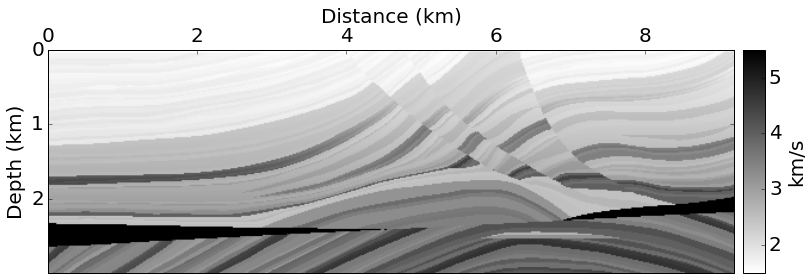

In [7]:
yticks=[0,1,2] # y축 ticks
cticks=[2,3,4,5] # colorbar ticks
plot_vel(vel,h,yticks=yticks,cticks=cticks)

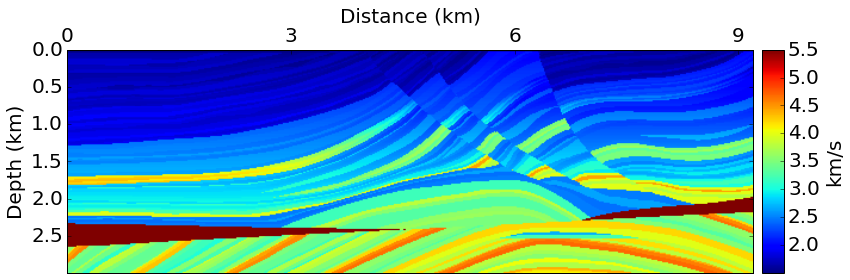

In [8]:
# 컬러로 그리고(cmap='jet') 파일로 저장하기
plot_vel(vel,h,xticks=[0,3,6,9],cmap='jet')
plt.savefig("vel.png",bbox_inches='tight')

결과물로 저장한 `vel.png` 파일은 다음과 같습니다.

![vel](vel.png)
(vel.png)